# An introduction to Data Analytics: Day 2
Pandas, matplotlib, and more

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# did you notice the magic command here?
%matplotlib inline  

We downloaded the incident.csv dataset from here: https://docs.celonis.com/en/event-log-sample-files.html

In [2]:
df_incidents = pd.read_csv('./data/incident.csv')
df_incidents.head()  # "head" displays the first 5 records in the dataframe

,number,sys_created_on,sys_created_by,opened_at,resolved_at,reopened_time,activity_due,closed_at,closed_by,due_date,sla_due,contact_type,category,urgency,short_description,priority,state,escalation
0,INC0,2020-01-01 02:22:21,UserA,2020-03-26 01:40:07,2020-06-06 13:34:48,NaN,NaN,NaN,UserC,2020-05-17 22:15:02,NaN,walk-in,Help,1 High,This is a description,2 - High,In Progress,Moderate
1,INC1,2020-02-28 11:44:42,UserA,2020-03-09 05:35:03,NaN,NaN,2020-04-13 09:16:21,NaN,UserA,NaN,NaN,phone,Software,1 High,This is a description,3 - Moderate,In Progress,New
2,INC2,2020-01-12 18:57:25,UserG,2020-03-27 04:05:08,NaN,NaN,2020-03-25 00:06:29,NaN,UserB,NaN,2020-06-05 07:38:10,phone,Hardware,2 Medium,This is a description,4 - Low,Normal,NaN
3,INC3,2020-01-08 06:31:25,UserB,2020-02-24 16:16:52,NaN,NaN,NaN,NaN,UserB,NaN,NaN,phone,Software,3 Low,This is a description,4 - Low,On Hold,Overdue
4,INC4,2020-02-23 03:59:31,UserA,2020-02-18 21:54:20,NaN,NaN,2020-03-26 09:29:55,NaN,UserA,NaN,NaN,email,Network,2 Medium,This is a description,4 - Low,On Hold,Normal


In [3]:
df_incidents.tail()  # "tail" gives us the last 5 records in the dataframe

,number,sys_created_on,sys_created_by,opened_at,resolved_at,reopened_time,activity_due,closed_at,closed_by,due_date,sla_due,contact_type,category,urgency,short_description,priority,state,escalation
49995,INC49995,2020-02-08 12:12:33,UserF,2020-02-19 03:13:07,NaN,NaN,2020-04-08 08:03:22,NaN,UserD,2020-05-23 05:10:17,NaN,email,Software,1 High,This is a description,5 - Planning,NaN,NaN
49996,INC49996,2020-01-22 05:56:29,UserA,2020-03-14 21:06:57,NaN,NaN,NaN,NaN,UserA,2020-05-13 03:43:58,NaN,email,Smartphone,2 Medium,This is a description,3 - Moderate,NaN,High
49997,INC49997,2020-02-09 22:35:22,UserB,2020-02-10 10:59:58,NaN,NaN,2020-03-04 02:09:01,NaN,UserB,NaN,NaN,phone,Hardware,3 Low,This is a description,5 - Planning,Normal,Normal
49998,INC49998,2020-02-21 12:26:55,UserE,2020-03-25 16:30:28,NaN,NaN,NaN,NaN,UserB,NaN,NaN,walk-in,Network,2 Medium,This is a description,5 - Planning,Closed,Overdue
49999,INC49999,2020-01-21 00:06:43,UserA,2020-03-11 03:49:24,NaN,NaN,2020-03-14 17:27:12,NaN,UserA,NaN,NaN,phone,Help,2 Medium,This is a description,2 - High,Closed,New


In [4]:
# if i really want to get crazy, i'll just randomly sample some rows
df_incidents.sample(5)

,number,sys_created_on,sys_created_by,opened_at,resolved_at,reopened_time,activity_due,closed_at,closed_by,due_date,sla_due,contact_type,category,urgency,short_description,priority,state,escalation
8783,INC8783,2020-02-26 01:05:14,UserB,2020-03-02 20:45:23,NaN,2020-08-18 15:12:20,2020-04-16 14:14:10,NaN,UserD,2020-05-15 02:25:12,2020-06-16 10:12:45,email,Hardware,3 Low,This is a description,5 - Planning,Closed,New
49509,INC49509,2020-02-10 18:01:22,UserA,2020-03-24 22:12:06,NaN,NaN,2020-04-16 19:44:50,NaN,UserA,2020-04-21 13:15:01,2020-06-07 21:03:16,walk-in,Network,2 Medium,This is a description,4 - Low,Closed,Overdue
5790,INC5790,2020-02-01 09:42:46,UserA,2020-03-01 04:59:03,NaN,NaN,NaN,NaN,UserA,2020-04-24 03:12:21,2020-06-07 14:39:16,walk-in,Network,2 Medium,This is a description,3 - Moderate,Normal,NaN
25712,INC25712,2020-02-19 06:22:05,UserA,2020-02-02 16:44:59,2020-07-19 11:49:35,2020-08-13 02:43:48,NaN,NaN,UserA,NaN,NaN,walk-in,Software,2 Medium,This is a description,4 - Low,Normal,Overdue
38119,INC38119,2020-02-03 13:40:58,UserB,2020-03-03 05:59:27,NaN,NaN,NaN,NaN,UserB,2020-05-04 20:57:38,NaN,phone,Help,2 Medium,This is a description,2 - High,In Progress,Normal


In [5]:
df_incidents.iloc[5,0:3]  # "iloc" helps me slice the dataframe by index

number                           INC5
sys_created_on    2020-02-23 09:51:05
sys_created_by                  UserC
Name: 5, dtype: object

In [6]:
df_incidents.loc[5, 'number':'sys_created_by']  # "loc" is a more "labeled" way to slice your dataframe

number                           INC5
sys_created_on    2020-02-23 09:51:05
sys_created_by                  UserC
Name: 5, dtype: object

In [7]:
# with pandas, there are usually multiple ways to do the same thing
df_incidents[df_incidents.index==5][['number','sys_created_on', 'sys_created_by']]

,number,sys_created_on,sys_created_by
5,INC5,2020-02-23 09:51:05,UserC


In [8]:
# While we're on the topic of slicing and filtering, what cool stuff can we do with a timestamp as index?

df_ts_index = df_incidents.copy()
df_ts_index['opened_at'] = pd.to_datetime(df_ts_index.opened_at)
df_ts_index = df_ts_index.set_index('opened_at').sort_index()
df_ts_index.head()


,number,sys_created_on,sys_created_by,resolved_at,reopened_time,activity_due,closed_at,closed_by,due_date,sla_due,contact_type,category,urgency,short_description,priority,state,escalation
opened_at,,,,,,,,,,,,,,,,,
2020-02-01 00:03:11,INC39137,2020-01-25 21:09:05,UserC,NaN,NaN,NaN,NaN,UserB,NaN,NaN,email,Network,3 Low,This is a description,5 - Planning,On Hold,NaN
2020-02-01 00:04:15,INC42577,2020-01-19 19:23:42,UserF,2020-07-07 04:03:30,2020-08-23 06:23:12,NaN,NaN,UserD,NaN,NaN,email,Hardware,1 High,This is a description,3 - Moderate,In Progress,Overdue
2020-02-01 00:07:23,INC49343,2020-01-07 12:53:36,UserD,NaN,2020-07-22 16:05:53,NaN,NaN,UserA,NaN,NaN,walk-in,Smartphone,1 High,This is a description,3 - Moderate,NaN,Overdue
2020-02-01 00:07:27,INC29958,2020-01-16 20:34:37,UserF,NaN,NaN,NaN,NaN,UserG,2020-05-07 12:16:40,NaN,email,Software,1 High,This is a description,3 - Moderate,In Progress,Overdue
2020-02-01 00:09:01,INC7331,2020-02-14 13:42:39,UserC,NaN,NaN,2020-04-16 19:26:48,NaN,UserB,2020-04-06 03:11:37,NaN,email,Smartphone,3 Low,This is a description,5 - Planning,NaN,Moderate


In [9]:
# we can easily grab a particular month
df_ts_index.loc['2020-03'].head()

,number,sys_created_on,sys_created_by,resolved_at,reopened_time,activity_due,closed_at,closed_by,due_date,sla_due,contact_type,category,urgency,short_description,priority,state,escalation
opened_at,,,,,,,,,,,,,,,,,
2020-03-01 00:01:23,INC49242,2020-01-14 10:45:18,UserA,2020-06-13 04:41:13,2020-08-11 21:11:44,NaN,NaN,UserB,2020-05-21 04:46:01,NaN,email,Help,3 Low,This is a description,3 - Moderate,In Progress,High
2020-03-01 00:02:48,INC14362,2020-02-06 22:33:22,UserB,NaN,NaN,2020-04-15 11:35:50,NaN,UserD,NaN,NaN,walk-in,Network,2 Medium,This is a description,2 - High,Closed,NaN
2020-03-01 00:04:07,INC13279,2020-02-16 23:10:49,UserE,NaN,NaN,2020-04-09 01:45:15,NaN,UserA,NaN,NaN,walk-in,Smartphone,2 Medium,This is a description,2 - High,In Progress,Moderate
2020-03-01 00:05:29,INC36567,2020-02-17 07:59:45,UserE,2020-07-10 04:42:19,NaN,NaN,NaN,UserA,NaN,2020-06-07 12:11:17,email,Smartphone,2 Medium,This is a description,3 - Moderate,In Progress,New
2020-03-01 00:08:06,INC41744,2020-01-26 19:45:25,UserG,NaN,NaN,2020-03-19 18:14:03,2020-10-12 10:41:30,UserA,2020-05-05 15:33:16,2020-06-22 17:01:55,walk-in,Smartphone,1 High,This is a description,3 - Moderate,Normal,Overdue


In [10]:
# or a particular day
df_ts_index.loc['2020-03-01'].head()

,number,sys_created_on,sys_created_by,resolved_at,reopened_time,activity_due,closed_at,closed_by,due_date,sla_due,contact_type,category,urgency,short_description,priority,state,escalation
opened_at,,,,,,,,,,,,,,,,,
2020-03-01 00:01:23,INC49242,2020-01-14 10:45:18,UserA,2020-06-13 04:41:13,2020-08-11 21:11:44,NaN,NaN,UserB,2020-05-21 04:46:01,NaN,email,Help,3 Low,This is a description,3 - Moderate,In Progress,High
2020-03-01 00:02:48,INC14362,2020-02-06 22:33:22,UserB,NaN,NaN,2020-04-15 11:35:50,NaN,UserD,NaN,NaN,walk-in,Network,2 Medium,This is a description,2 - High,Closed,NaN
2020-03-01 00:04:07,INC13279,2020-02-16 23:10:49,UserE,NaN,NaN,2020-04-09 01:45:15,NaN,UserA,NaN,NaN,walk-in,Smartphone,2 Medium,This is a description,2 - High,In Progress,Moderate
2020-03-01 00:05:29,INC36567,2020-02-17 07:59:45,UserE,2020-07-10 04:42:19,NaN,NaN,NaN,UserA,NaN,2020-06-07 12:11:17,email,Smartphone,2 Medium,This is a description,3 - Moderate,In Progress,New
2020-03-01 00:08:06,INC41744,2020-01-26 19:45:25,UserG,NaN,NaN,2020-03-19 18:14:03,2020-10-12 10:41:30,UserA,2020-05-05 15:33:16,2020-06-22 17:01:55,walk-in,Smartphone,1 High,This is a description,3 - Moderate,Normal,Overdue


In [11]:
# or rows in a range of days
df_ts_index.loc['2020-03-01':'2020-03-05'].head()

,number,sys_created_on,sys_created_by,resolved_at,reopened_time,activity_due,closed_at,closed_by,due_date,sla_due,contact_type,category,urgency,short_description,priority,state,escalation
opened_at,,,,,,,,,,,,,,,,,
2020-03-01 00:01:23,INC49242,2020-01-14 10:45:18,UserA,2020-06-13 04:41:13,2020-08-11 21:11:44,NaN,NaN,UserB,2020-05-21 04:46:01,NaN,email,Help,3 Low,This is a description,3 - Moderate,In Progress,High
2020-03-01 00:02:48,INC14362,2020-02-06 22:33:22,UserB,NaN,NaN,2020-04-15 11:35:50,NaN,UserD,NaN,NaN,walk-in,Network,2 Medium,This is a description,2 - High,Closed,NaN
2020-03-01 00:04:07,INC13279,2020-02-16 23:10:49,UserE,NaN,NaN,2020-04-09 01:45:15,NaN,UserA,NaN,NaN,walk-in,Smartphone,2 Medium,This is a description,2 - High,In Progress,Moderate
2020-03-01 00:05:29,INC36567,2020-02-17 07:59:45,UserE,2020-07-10 04:42:19,NaN,NaN,NaN,UserA,NaN,2020-06-07 12:11:17,email,Smartphone,2 Medium,This is a description,3 - Moderate,In Progress,New
2020-03-01 00:08:06,INC41744,2020-01-26 19:45:25,UserG,NaN,NaN,2020-03-19 18:14:03,2020-10-12 10:41:30,UserA,2020-05-05 15:33:16,2020-06-22 17:01:55,walk-in,Smartphone,1 High,This is a description,3 - Moderate,Normal,Overdue


In [12]:
# usually one of the first things we check when reading in a new dataframe is how pandas "data types" each column
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   number             50000 non-null  object
 1   sys_created_on     50000 non-null  object
 2   sys_created_by     50000 non-null  object
 3   opened_at          50000 non-null  object
 4   resolved_at        10110 non-null  object
 5   reopened_time      8316 non-null   object
 6   activity_due       25112 non-null  object
 7   closed_at          6287 non-null   object
 8   closed_by          50000 non-null  object
 9   due_date           16757 non-null  object
 10  sla_due            12541 non-null  object
 11  contact_type       50000 non-null  object
 12  category           50000 non-null  object
 13  urgency            50000 non-null  object
 14  short_description  50000 non-null  object
 15  priority           50000 non-null  object
 16  state              39998 non-null  objec

In [13]:
# there are several fields with "missing" data
print('Pandas "info" function gives us a quick snapshot of the columns in the dataframe, their datatypes, and how much data is null or missing.  For example:')
print('The "reopened_time" column only has {0:,} non null values out of a total of {1:,}.'.format(df_incidents[~df_incidents.reopened_time.isna()].shape[0], df_incidents.shape[0]))

# Pandas has lots of functions to help you deal with NaNs including: dropna, fillna, ffill, bfill

Pandas "info" function gives us a quick snapshot of the columns in the dataframe, their datatypes, and how much data is null or missing.  For example:
The "reopened_time" column only has 8,316 non null values out of a total of 50,000.


In [14]:
# it's often helpful to appropriately "type" timestamps, numerics, and categorical variables
# make note of how I both refer to a column with "key" notation and "dot" notation
df_incidents['sys_created_on'] = pd.to_datetime(df_incidents.sys_created_on)
df_incidents['opened_at'] = pd.to_datetime(df_incidents.opened_at)
df_incidents['closed_at'] = pd.to_datetime(df_incidents.closed_at)
df_incidents['activity_due'] = pd.to_datetime(df_incidents.activity_due)
df_incidents['due_date'] = pd.to_datetime(df_incidents.due_date)
df_incidents['sla_due'] = pd.to_datetime(df_incidents.sla_due)

df_incidents['category'] = df_incidents.category.astype('category')
df_incidents['urgency'] = df_incidents.urgency.astype('category')
df_incidents['priority'] = df_incidents.priority.astype('category')

# adding "date" fields can be helpful later on (an easy example of feature engineering)
df_incidents['opened_at_dt'] = pd.to_datetime(df_incidents.sys_created_on).dt.date
df_incidents['opened_at_dow'] = pd.to_datetime(df_incidents.sys_created_on).dt.dayofweek
df_incidents['opened_at_hour'] = pd.to_datetime(df_incidents.sys_created_on).dt.hour

In [15]:
df_incidents.describe()  # this is sometimes called the 5 number summary

,sys_created_on,opened_at,activity_due,closed_at,due_date,sla_due,opened_at_dow,opened_at_hour
count,50000,50000,25112,6287,16757,12541,50000.000000,50000.000000
mean,2020-01-30 11:18:29.030279936,2020-02-29 13:20:21.254459904,2020-03-30 06:22:42.740363520,2020-09-29 20:00:16.511372800,2020-04-29 15:25:33.722504448,2020-05-30 06:10:55.335938048,2.995260,11.470000
min,2020-01-01 00:02:16,2020-02-01 00:03:11,2020-03-01 00:02:51,2020-09-01 00:05:42,2020-04-01 00:01:20,2020-05-01 00:07:37,0.000000,0.000000
25%,2020-01-15 00:33:09.750000128,2020-02-14 22:01:39.750000128,2020-03-14 20:04:53.750000128,2020-09-14 22:48:23.500000,2020-04-14 17:04:19,2020-05-15 00:21:45,1.000000,5.000000
50%,2020-01-28 22:57:12,2020-03-01 01:42:26,2020-03-28 17:05:19,2020-09-28 22:05:08,2020-04-28 10:59:59,2020-05-28 17:05:13,3.000000,11.000000
75%,2020-02-14 23:16:09.500000,2020-03-15 02:57:51,2020-04-14 15:27:47.249999872,2020-10-14 20:03:16,2020-05-14 12:42:25,2020-06-14 17:10:03,5.000000,17.000000
max,2020-02-28 23:59:22,2020-03-28 23:59:34,2020-04-28 23:58:48,2020-10-28 23:49:41,2020-05-28 23:58:01,2020-06-28 23:58:15,6.000000,23.000000
std,NaN,NaN,NaN,NaN,NaN,NaN,1.997908,6.911826


Let's jump into some charts.  We'll start with counting the incidents over time.  Note that the chart is a little deceptive because matplotlib has chosen to start the Y Axis at 800.

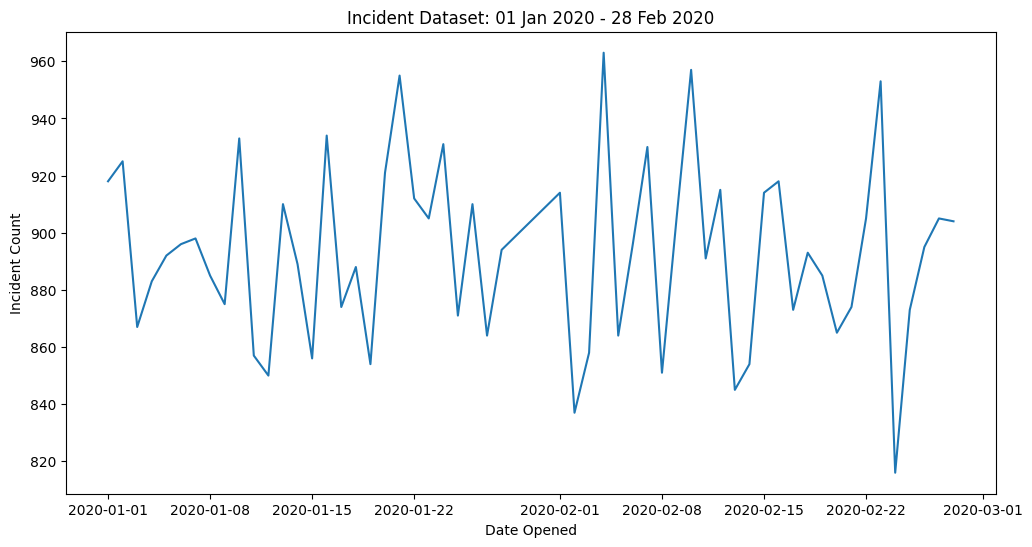

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

_ = df_incidents[['opened_at_dt','number']].groupby('opened_at_dt').count().plot.line(legend=None, ax=ax)
_ = ax.set_title(f'Incident Dataset: {df_incidents.opened_at_dt.min():%d %b %Y} - {df_incidents.opened_at_dt.max():%d %b %Y}')
_ = ax.set_xlabel('Date Opened')
_ = ax.set_ylabel('Incident Count')

We can pack a little more information into our charts using Stacked Bar Charts.

C:\Users\brad\AppData\Local\Temp\ipykernel_303340\2788645659.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _ = df_incidents[['opened_at_dt','urgency','number']].groupby(['opened_at_dt','urgency']).count().unstack().plot(kind='bar', stacked=True, ax=ax[0])
C:\Users\brad\AppData\Local\Temp\ipykernel_303340\2788645659.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _ = df_incidents[['opened_at_dt','priority','number']].groupby(['opened_at_dt','priority']).count().unstack().plot(kind='bar', stacked=True, ax=ax[1])


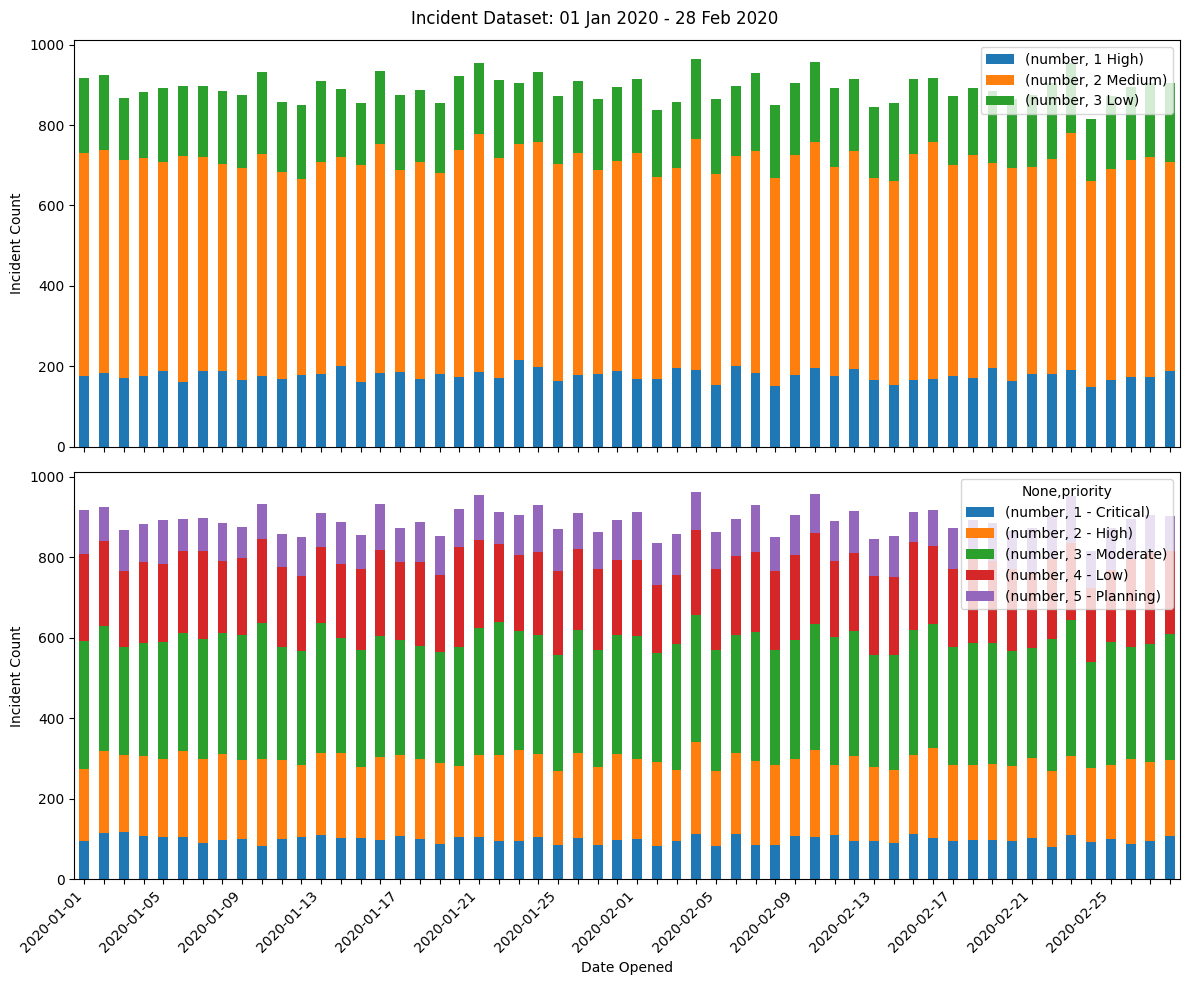

In [17]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12, 10))

_ = df_incidents[['opened_at_dt','urgency','number']].groupby(['opened_at_dt','urgency']).count().unstack().plot(kind='bar', stacked=True, ax=ax[0])
_ = df_incidents[['opened_at_dt','priority','number']].groupby(['opened_at_dt','priority']).count().unstack().plot(kind='bar', stacked=True, ax=ax[1])
_ = ax[0].set_ylabel('Incident Count')
_ = ax[0].legend(loc='upper right')
_ = ax[1].set_xlabel('Date Opened')
_ = ax[1].set_ylabel('Incident Count')

fig.suptitle(f'Incident Dataset: {df_incidents.opened_at_dt.min():%d %b %Y} - {df_incidents.opened_at_dt.max():%d %b %Y}')
fig.autofmt_xdate(rotation=45)

# let's thin out the x axis tick labels
tick_labels = [l.get_text() for l in ax[1].get_xticklabels()]
new_tick_labels = [''] * len(tick_labels)
new_tick_labels[::4] = tick_labels[::4]
_ = ax[1].set_xticklabels(new_tick_labels)

plt.tight_layout()

How about we look at the incidents by Day of Week?  Which day of the week has seen more incidents than others?<br/>
Note: In pandas (and in Python), Monday=0 and Sunday=6.

C:\Users\brad\AppData\Local\Temp\ipykernel_303340\626085461.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _ = df_incidents[['opened_at_dow','priority','number']].groupby(['opened_at_dow','priority']).count().unstack().loc[sorted_index,:].plot(kind='barh', stacked=True, ax=ax)


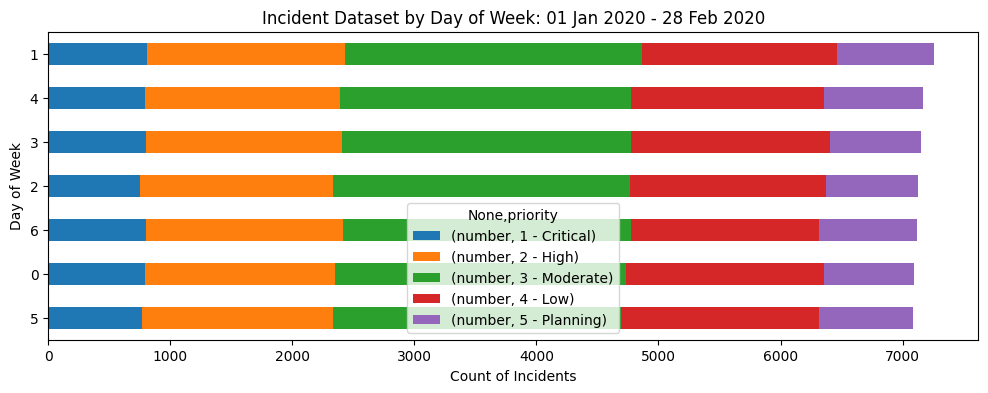

In [18]:
fig, ax = plt.subplots(figsize=(12, 4))

sorted_index = df_incidents[['opened_at_dow','number']].groupby(['opened_at_dow']).count().sort_values('number').index.tolist()
_ = df_incidents[['opened_at_dow','priority','number']].groupby(['opened_at_dow','priority']).count().unstack().loc[sorted_index,:].plot(kind='barh', stacked=True, ax=ax)
_ = ax.set_title(f'Incident Dataset by Day of Week: {df_incidents.opened_at_dt.min():%d %b %Y} - {df_incidents.opened_at_dt.max():%d %b %Y}')
_ = ax.set_xlabel('Count of Incidents')
_ = ax.set_ylabel('Day of Week')


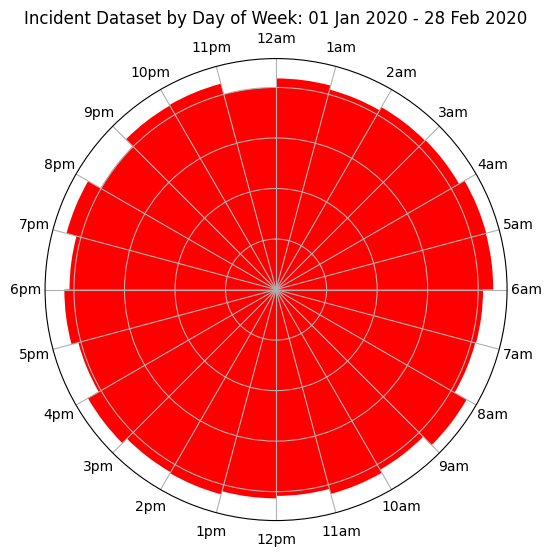

In [19]:
fig, ax = plt.subplots(figsize=(6,6), subplot_kw={'projection': 'polar'})

df_chart = df_incidents[['opened_at_hour','number']].groupby('opened_at_hour').count().copy()
theta = np.arange(df_chart.shape[0])/float(df_chart.shape[0]) * 2 * np.pi
_ = ax.bar(theta + theta[1]/2, df_chart.number, width=theta[1], color='red')
ticklabels = [(timedelta(hours=h) + datetime(2023,1,1)).strftime('%#I%p').lower() for h in range(0,24)]
_ = ax.set_xticks(theta)
_ = ax.set_xticklabels(ticklabels)
_ = ax.set_yticklabels([])
_ = ax.set_title(f'Incident Dataset by Day of Week: {df_incidents.opened_at_dt.min():%d %b %Y} - {df_incidents.opened_at_dt.max():%d %b %Y}')

ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

#### Annotating your charts
Matplotlib has a powerful annotation feature that can make your charts even more powerful.

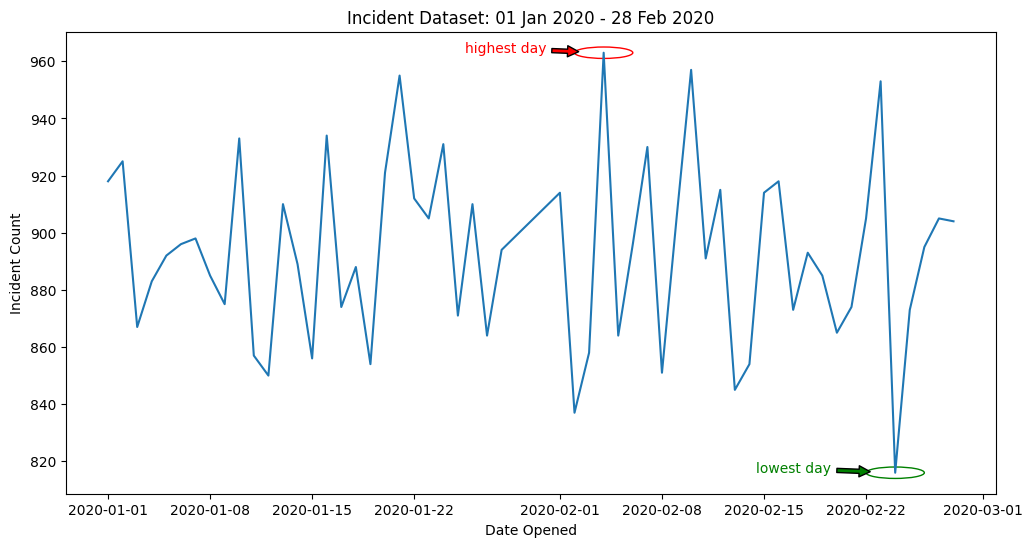

In [20]:
import matplotlib.patches as patches


fig, ax = plt.subplots(figsize=(12, 6))

lowest_day = df_incidents[['opened_at_dt','number']].groupby('opened_at_dt').count().sort_values('number').head(1).index.values[0]
lowest_amt = df_incidents[['opened_at_dt','number']].groupby('opened_at_dt').count().sort_values('number').head(1).number.values[0]
highest_day = df_incidents[['opened_at_dt','number']].groupby('opened_at_dt').count().sort_values('number').tail(1).index.values[0]
highest_amt = df_incidents[['opened_at_dt','number']].groupby('opened_at_dt').count().sort_values('number').tail(1).number.values[0]

_ = df_incidents[['opened_at_dt','number']].groupby('opened_at_dt').count().plot.line(legend=None, ax=ax)
_ = ax.set_title(f'Incident Dataset: {df_incidents.opened_at_dt.min():%d %b %Y} - {df_incidents.opened_at_dt.max():%d %b %Y}')
_ = ax.set_xlabel('Date Opened')
_ = ax.set_ylabel('Incident Count')

# annotate highest day and lowest day
for xy, l, c in [((highest_day, highest_amt), 'highest day', 'r'), ((lowest_day, lowest_amt), 'lowest day', 'g')]:
    circ1 = patches.Circle(xy, 2, lw=1.0, ec=c, fill=False)
    ax.add_artist(circ1)
    circ1.set_clip_box(ax.bbox)

    _ = ax.annotate(l, xy=xy, xytext=(-100, 0), textcoords='offset points', color=c, 
                    arrowprops=dict(arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                    facecolor=c, shrinkB=15*1.2))

#### Built in "styles"
Matplotlib includes a number of available styles that you can apply to your charts.

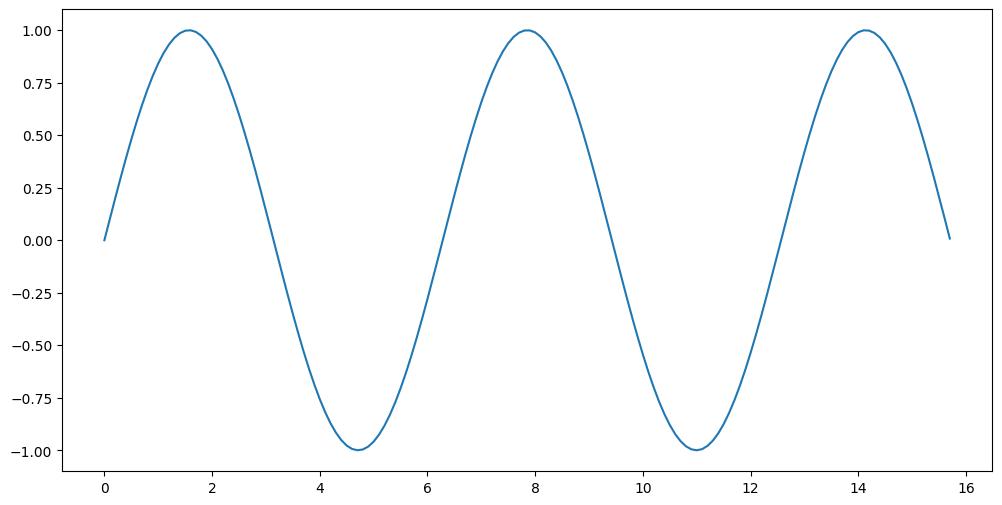

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))

#plt.xkcd()  # using the XKCD "style"
x = np.arange(0, 5*np.pi, 0.1)
y = np.sin(x)
_ = ax.plot(x, y)


#### Homework Assignment
Often with incidents, management wants to know how long it took to close an incident.  With this dataset, can you tell me:
 - The average time an incident stayed open
 - The median open time for these incidents
 - The incident that stayed open the shortest amount of time
 - The incident that stayed open the longest
 - For extra credit, create a chart that depicts these ideas

<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

#### Don't scroll down unless you want to see the answer...

In [22]:
# Step 1: Calculate open time
(df_incidents.closed_at - df_incidents.opened_at).info()

# Some Notes:
# 1. We can only do the above arithmetic because we cast both of these columns to datetime data types higher up in this notebook.
# 2. By using the info function, we can see that only 6287 records out of 50,000 return a value other than NULL.  That's only about 12% of our dataset.  

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: None
Non-Null Count  Dtype          
--------------  -----          
6287 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 390.8 KB


In [23]:
data = (df_incidents.closed_at - df_incidents.opened_at).dropna().dt.days
print(f'Only {len(data):,} records out of {df_incidents.shape[0]:,} had valid timedelta values.  That\'s about {(len(data)/df_incidents.shape[0])*100}%.')
print(f'These incidents stayed open an average of {data.mean():.2f} days.')
print(f'The median days open was {data.median()} days.')
print(f'The shortest incident life was {data.min()} days.')
print(f'The longest incident life was {data.max()} days.')

Only 6,287 records out of 50,000 had valid timedelta values.  That's about 12.574%.
These incidents stayed open an average of 213.09 days.
The median days open was 213.0 days.
The shortest incident life was 156 days.
The longest incident life was 270 days.


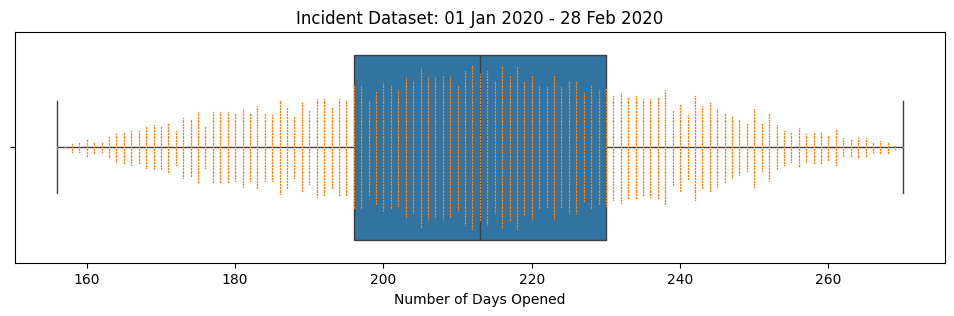

In [24]:
# I like to combine Seaborn's boxplot and swarmplot to visualize population distribution details; however, in this case, it's probably a BAD idea--at least to use the
# swarmplot since there's such a large number of values in the distribution.  Other visualization options could include histograms and cumulative distribution functions (CDFs).

fig, ax = plt.subplots(figsize=(12, 3))

# Often, I like using a combination of Seaborn's boxplot and swarmplot to visualize the distribution of a dataset; although, there's probably too much data here for the swarmplot
_ = sns.boxplot(x=data, ax=ax)
_ = sns.swarmplot(x=data, s=1, ax=ax)

# as always, we want to properly label our chart
_ = ax.set_title(f'Incident Dataset: {df_incidents.opened_at_dt.min():%d %b %Y} - {df_incidents.opened_at_dt.max():%d %b %Y}')
_ = ax.set_xlabel('Number of Days Opened')

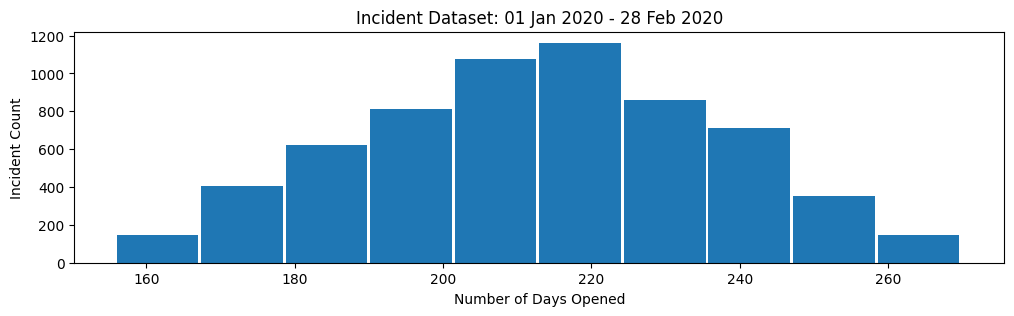

In [33]:
fig, ax = plt.subplots(figsize=(12, 3))

_ = ax.hist(data, width=11.0)
_ = ax.set_title(f'Incident Dataset: {df_incidents.opened_at_dt.min():%d %b %Y} - {df_incidents.opened_at_dt.max():%d %b %Y}')
_ = ax.set_xlabel('Number of Days Opened')
_ = ax.set_ylabel('Incident Count')

### Some visualization references:
 - https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
 - https://python-graph-gallery.com/